In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("amazon.csv")

# Clean and convert numeric columns
def clean_price_column(col):
    return col.str.replace("\u20b9", "").str.replace(",", "").str.strip().astype(float)

def clean_percentage_column(col):
    return col.str.replace("%", "").astype(float)

def clean_numeric_column(col):
    return col.str.replace(",", "").astype(float)

df["discounted_price"] = clean_price_column(df["discounted_price"])
df["actual_price"] = clean_price_column(df["actual_price"])
df["discount_percentage"] = clean_percentage_column(df["discount_percentage"])
df = df[df["rating"].str.replace("|", "", regex=False).str.strip().str.match(r"^\d+(\.\d+)?$")]
df["rating"] = df["rating"].astype(float)
df["rating_count"] = clean_numeric_column(df["rating_count"])

In [2]:
# 1. Average rating for each product category
avg_rating_by_category = df.groupby("category")["rating"].mean().sort_values(ascending=False)
print(avg_rating_by_category)

category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                                               4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

In [3]:
# 2. Top products by rating count in each category
top_products_by_rating = df.loc[df.groupby("category")["rating_count"].idxmax(), ["category", "product_name", "rating_count"]]
print(top_products_by_rating)

                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
748   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4426.0  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...        7222.0  
748

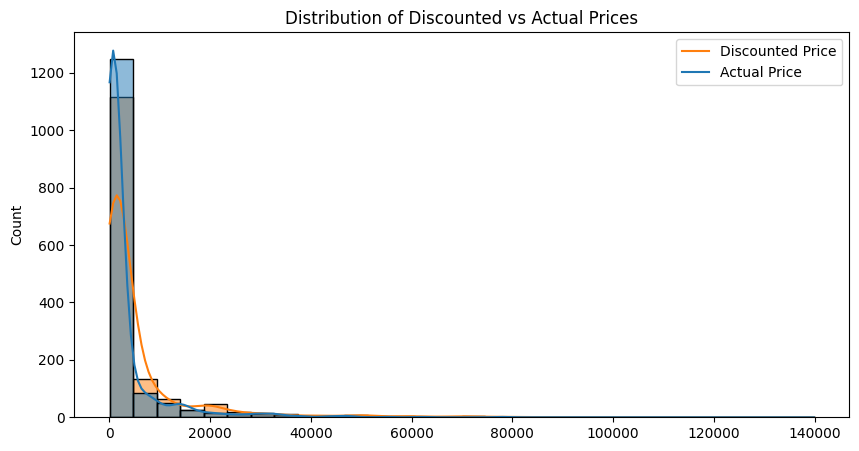

In [4]:
# 3. Distribution of discounted vs. actual prices
plt.figure(figsize=(10, 5))
sns.histplot(df[["discounted_price", "actual_price"]], bins=30, kde=True)
plt.title("Distribution of Discounted vs Actual Prices")
plt.legend(["Discounted Price", "Actual Price"])
plt.show()

In [5]:
# 4. Average discount percentage across categories
avg_discount_by_category = df.groupby("category")["discount_percentage"].mean().sort_values(ascending=False)
print(avg_discount_by_category)

category
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                 90.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                          90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                  90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                 88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers       87.5
                                                                                                                    ... 
OfficeProducts|OfficeElectronics|Calculators|Basic                                                                   0.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories|StandMixerAccessories     0.0
Electronics|HomeAudio|M

In [6]:
# 5. Most popular product names
popular_products = df["product_name"].value_counts().head(10)
print(popular_products)

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                                             

In [7]:
# 6. Most popular product keywords
df["keywords"] = df["product_name"].str.split().explode()
popular_keywords = df["keywords"].value_counts().head(10)
print(popular_keywords)

ValueError: cannot reindex on an axis with duplicate labels

In [9]:
# 7. Most popular product reviews
popular_reviews = df["review_content"].value_counts().head(10)
print(popular_reviews)

review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a littl

In [10]:
# 8. Correlation between discounted price and rating
correlation = df[["discounted_price", "rating"]].corr()
print(correlation)

                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


In [11]:
# 9. Top 5 categories based on highest ratings
top_categories = avg_rating_by_category.head(5)
print(top_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64
